<a href="https://colab.research.google.com/github/DCI-alxogm/ml2023-JuanLeonelSantamariaMena/blob/main/Oct27-28/Ejercicio1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install scienceplots

In [118]:
!git clone https://github.com/sbailey/empca.git

Cloning into 'empca'...
remote: Enumerating objects: 80, done.
remote: Total 80 (delta 0), reused 0 (delta 0), pack-reused 80
Receiving objects: 100% (80/80), 18.02 KiB | 6.01 MiB/s, done.
Resolving deltas: 100% (37/37), done.


In [ ]:
import numpy as np
from astropy.io import fits
from astropy.table import Table
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import scienceplots
import sklearn as sk

In [ ]:
# amplitud
amplitud= np.zeros(100)
for i in range(len(amplitud)):
  amplitud[i]= abs(np.random.normal())
ruido= np.zeros(200)

f= lambda x, fase: np.sin(x+fase)
#y=amplitud[1]*f(x,fase[1])+ruido

In [129]:
y=[]
r=[]
x = np.linspace(0, 4*np.pi,200)
fase= np.linspace(np.pi, np.pi,100)
for i in range(len(fase)):
  for j in range(len(ruido)):
    ruido[j]= np.random.normal()
  y.append(amplitud[i]*f(x,fase[i])+ruido)
  r.append(ruido)

In [131]:
len(r)

100

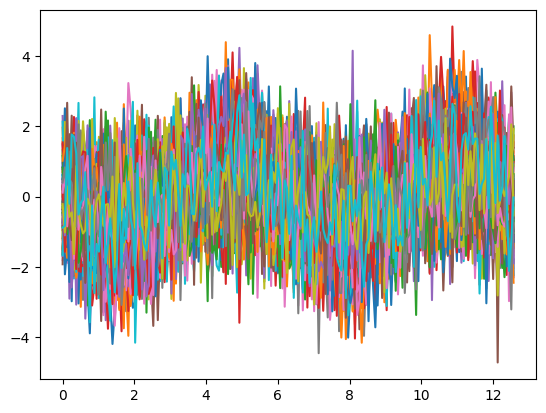

In [140]:
for i in range(100):
  plt.plot(x,y[i])

In [142]:
pca = PCA()
componentes_principales = pca.fit_transform(y)

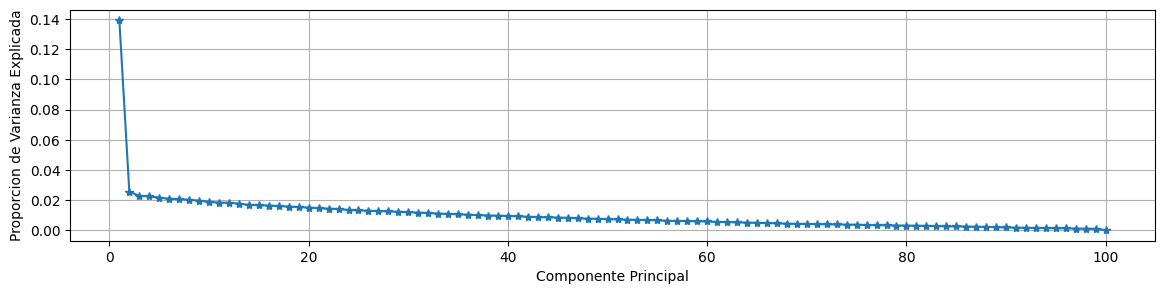

In [143]:
# Graficar la proporción de varianza explicada
plt.figure(figsize=(14,3))
PVE = pca.explained_variance_ratio_
plt.plot(np.arange(1,len(PVE) + 1), PVE, marker = '*')
plt.xlabel('Componente Principal')
plt.ylabel('Proporcion de Varianza Explicada')
plt.grid()
plt.show()

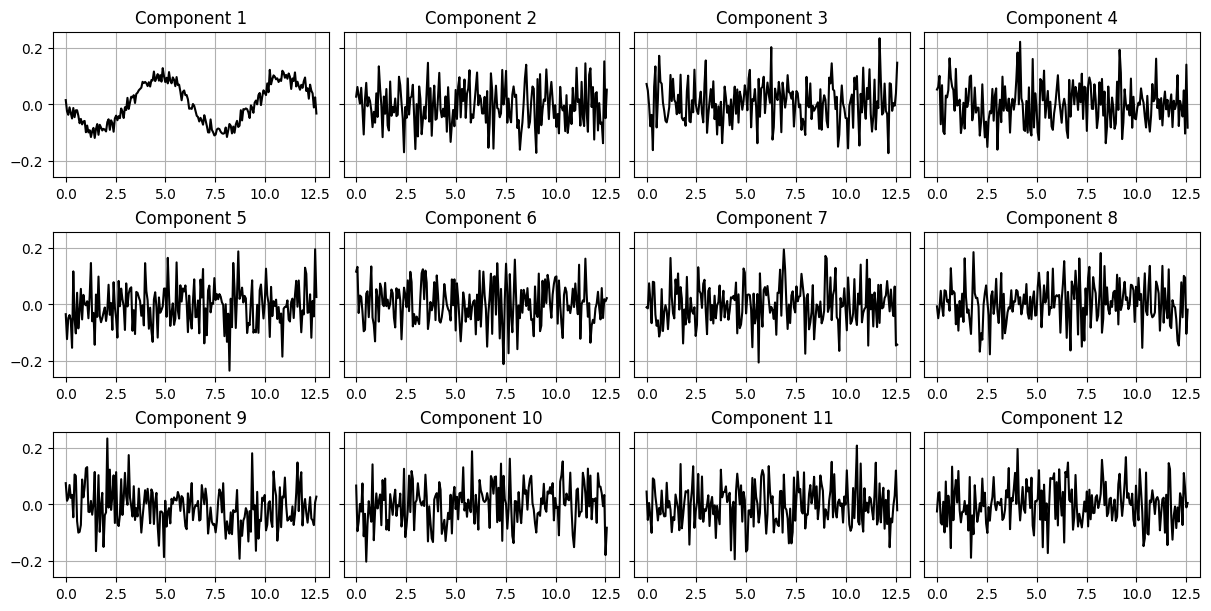

In [144]:
components = pca.components_
nrows_ = 3
ncols_ = 4
fig, axes = plt.subplots(nrows=nrows_, ncols=ncols_, figsize=(12, 6), sharey=True ,layout='constrained')
for ax, i in zip(axes.flat, range(nrows_*ncols_)):
  ax.plot(x, components[i], 'k')
  ax.set_title(f'Component {i+1}')
  ax.grid()

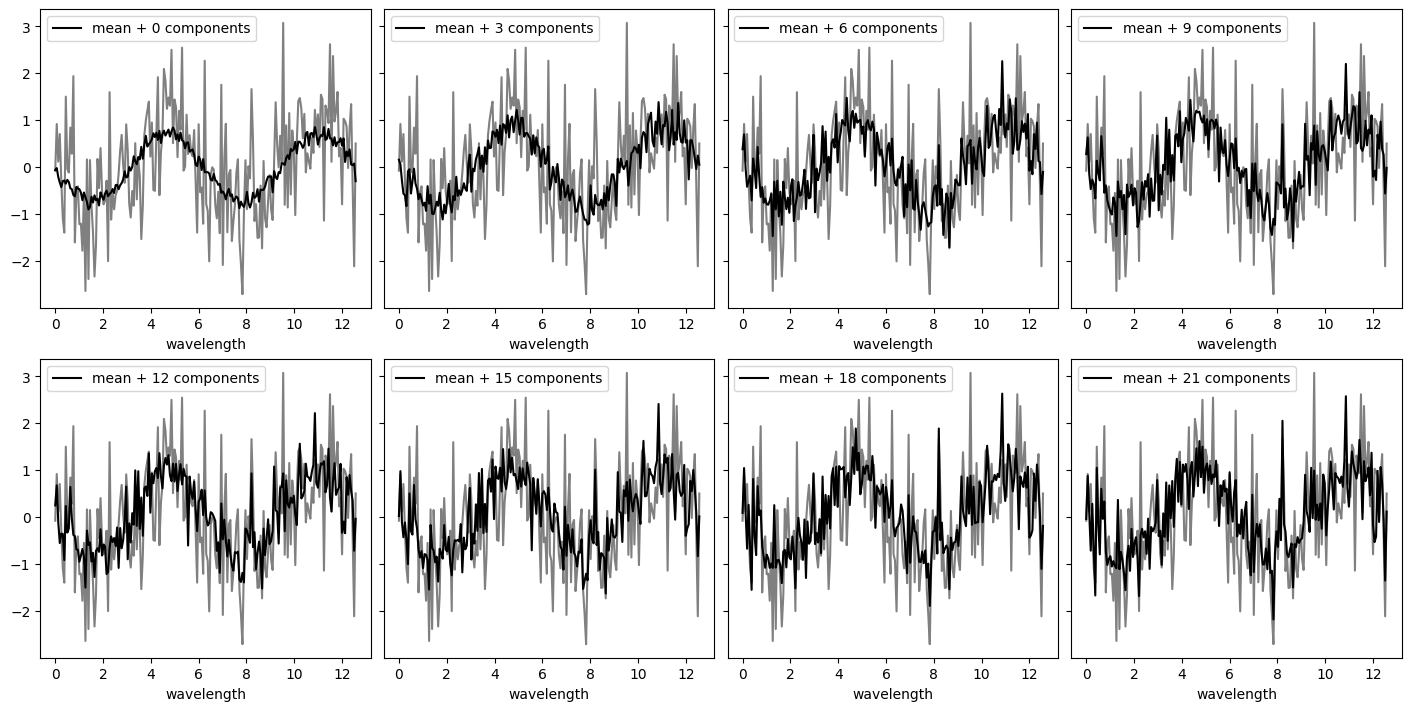

In [145]:
y=np.array(y)
spec_mean = y.mean(0)
spec = y[0]
coeff = np.dot(components, spec-spec_mean)

nrows_ = 2
ncols_ = 4
fig, axes = plt.subplots(nrows=nrows_, ncols=ncols_, figsize=(14, 7), sharey=True ,layout='constrained')
for ax, i in zip(axes.flat, [0, 3, 6, 9, 12, 15, 18, 21] ):
#for ax, i in zip(axes.flat, range(nrows_*ncols_)):
  ax.plot(x, spec,'-', color='gray')
  ax.plot(x, spec_mean + np.dot(coeff[:i], components[:i]), 'k',label = f'mean + {i} components')
  ax.legend()
  ax.set_xlabel('wavelength')

In [125]:
from empca import empca

In [133]:
r=np.array(r)
w=1/r**2

In [151]:
m = empca.empca(y,w)

       iter        R2             rchi2
EMPCA  1/25      -0.34958186   2465.04622959
EMPCA  2/25       0.24927127    124.07634338
EMPCA  3/25       0.27267254     33.46857737
EMPCA  4/25       0.27359488     30.96269252


/content/empca/empca.py:256: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  x = np.linalg.lstsq(A, b)[0]


EMPCA  5/25       0.27348958     30.67772792
EMPCA  6/25       0.27343316     30.48484762
EMPCA  7/25       0.27341351     30.34343645
EMPCA  8/25       0.27339813     30.26421880
EMPCA  9/25       0.27337489     30.24569896
EMPCA 10/25       0.27334584     30.25847889
EMPCA 11/25       0.27331948     30.25611470
EMPCA 12/25       0.27330321     30.20133230
EMPCA 13/25       0.27329828     30.08718580
EMPCA 14/25       0.27329989     29.93585502
EMPCA 15/25       0.27330112     29.77946897
EMPCA 16/25       0.27329679     29.64218492
EMPCA 17/25       0.27328468     29.53442506
EMPCA 18/25       0.27326486     29.45616210
EMPCA 19/25       0.27323853     29.40233679
EMPCA 20/25       0.27320718     29.36673463
EMPCA 21/25       0.27317213     29.34385211
EMPCA 22/25       0.27313448     29.32945401
EMPCA 23/25       0.27309503     29.32051974
EMPCA 24/25       0.27305437     29.31499078
EMPCA 25/25       0.27301294     29.31150448
R2: 0.27298568476107044


In [152]:
m_1 = empca.classic_pca(y)
print("r2",m_1.R2())

r2 1.0


In [160]:
def b_continuums(meanspec,coeff,eigvec,n_vec=5):
  conti_mok=[]
  for i in range(len(coeff)):
    spectram=[]
    for j in range(n_vec):
      spectram.append(coeff[i][j]*eigvec[j])
    spectrasm=np.vstack(spectram)
    specm = np.sum(spectrasm,axis=0)
    conti_mock  += (specm)
  continuum_mock = np.vstack(conti_mock)
  for i in range(len(continuum_mock)):
    continuum_mock[i]+= meanspec
  return continuum_mock


In [162]:
contempca=b_continuums(spec_mean,m.coeff,m.eigvec)

UnboundLocalError: ignored